In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('kyphosis.csv')

In [4]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


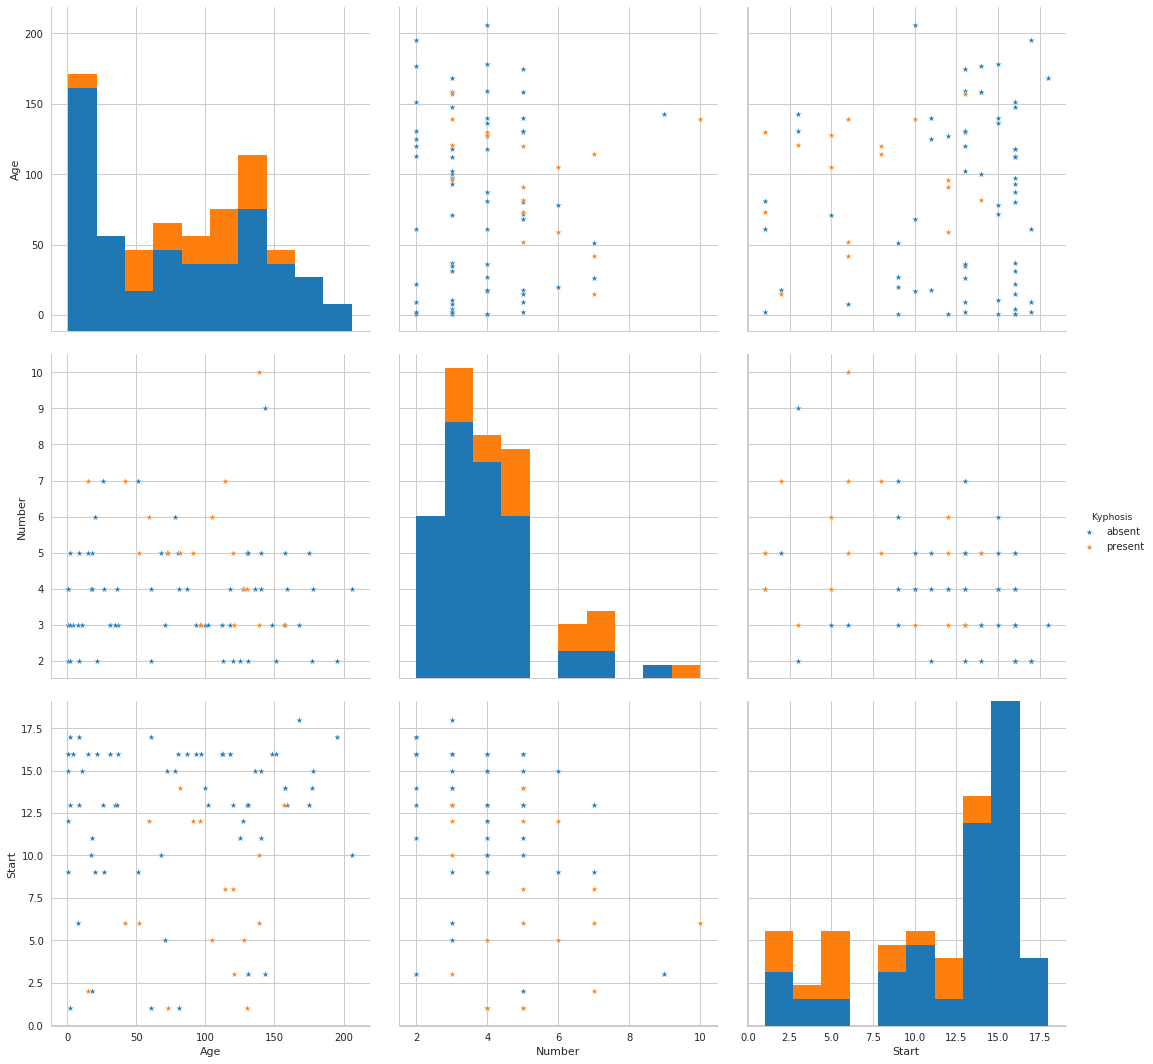

In [20]:

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.pairplot(data,hue='Kyphosis',size=5,markers='*',aspect=1)

In [21]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [24]:
x= data.drop('Kyphosis',axis=1)
y= data['Kyphosis']

In [25]:
from  sklearn.cross_validation  import train_test_split

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40)

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dtc = DecisionTreeClassifier()

In [112]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
prediction= dtc.predict(x_test)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print(classification_report(y_test,prediction))
print('\n \n')
cm= confusion_matrix(y_test,prediction)
cm = pd.DataFrame(cm.reshape(4,1),index=['TN','TYPE 1 ERROR','TYPE 2 error','TP'],columns=['rate'])
print(cm)

             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        23
    present       1.00      0.40      0.57        10

avg / total       0.86      0.82      0.79        33


 

              rate
TN              23
TYPE 1 ERROR     0
TYPE 2 error     6
TP               4


In [116]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rfc = RandomForestClassifier(n_estimators=9)

In [135]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
predictrfc =rfc.predict(x_test) 

In [137]:
print(classification_report(y_test,predictrfc))
print('\n \n')
cm= confusion_matrix(y_test,predictrfc)
cm = pd.DataFrame(cm.reshape(4,1),index=['TN','TYPE 1 ERROR','TYPE 2 error','TP'],columns=['rate'])
print(cm)

             precision    recall  f1-score   support

     absent       0.77      1.00      0.87        23
    present       1.00      0.30      0.46        10

avg / total       0.84      0.79      0.74        33


 

              rate
TN              23
TYPE 1 ERROR     0
TYPE 2 error     7
TP               3


In [129]:
data['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [132]:
error=[]
for i in range(1,50):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train,y_train)
    ipredictrfc =rfc.predict(x_test) 
    error.append(np.mean(ipredictrfc!=y_test))

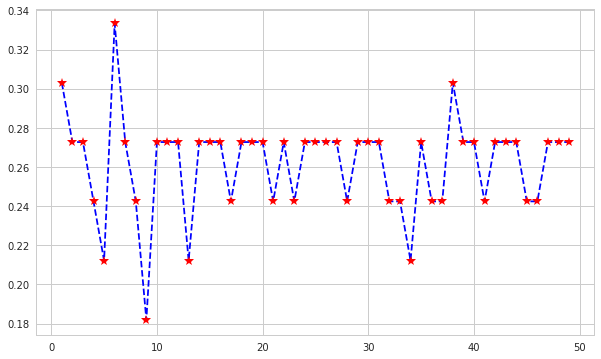

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='blue',marker='*',markersize=10,markerfacecolor='red',linestyle='--')